My CAB wp emu is doing very poorly after the s8 change and I can't figure out why. I'm gonna see if I can find the source of the issue relative to the other emus.

In [61]:
import h5py
import numpy as np

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline

In [85]:
with h5py.File('/u/ki/swmclau2/des/wp_cab/PearceWpCABCosmo.hdf5' , 'r') as wp_cab,\
         h5py.File('/u/ki/swmclau2/des/wp_cab/PearceWpCABCosmo2.hdf5' , 'r') as wp_cab2:
    
    print wp_cab.attrs['cosmo_param_names']
    print
    print wp_cab2.attrs['cosmo_param_names']
    
    wp_cab_cosmo = wp_cab['attrs']['cosmo_param_vals'][()]
    wp_cab2_cosmo = wp_cab2.attrs['cosmo_param_vals']
    
    wp_cab_ys = np.zeros((40,1000,18))
    for i, key in enumerate(wp_cab.keys()):
        if key=='attrs':
            continue
        wp_cab_ys[i-1] = wp_cab[key]['a_1.000']['obs'][()]
        
    wp_cab2_ys = np.zeros((40,1000,18))
    for i, key in enumerate(wp_cab2.keys()):
        if key=='attrs':
            continue

        wp_cab2_ys[i-1] = wp_cab2[key]['a_1.000']['obs'][()]

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']


In [87]:
np.all(wp_cab_ys==wp_cab2_ys)

True

In [89]:
np.all(wp_cab_cosmo==wp_cab2_cosmo)

True

In [93]:
with h5py.File('/u/ki/swmclau2/des/wp_cab_test/PearceWpCABCosmoTest.hdf5' , 'r') as wp_cab,\
         h5py.File('/u/ki/swmclau2/des/wp_cab_test/PearceWpCABCosmoTest2.hdf5' , 'r') as wp_cab2:
    
    print wp_cab.attrs['cosmo_param_names']
    print
    print wp_cab2.attrs['cosmo_param_names']
    
    wp_cab_test_cosmo = wp_cab.attrs['cosmo_param_vals']
    wp_cab_test2_cosmo = wp_cab2.attrs['cosmo_param_vals']
    
    wp_cab_test_ys = np.zeros((35,100,18))
    for i, key in enumerate(wp_cab.keys()):
        if key=='attrs':
            continue
        wp_cab_test_ys[i] = wp_cab[key]['a_1.000']['obs'][()]
        
    wp_cab_test2_ys = np.zeros((35,100,18))
    for i, key in enumerate(wp_cab2.keys()):
        if key=='attrs':
            continue

        wp_cab_test2_ys[i] = wp_cab2[key]['a_1.000']['obs'][()]

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']


In [94]:
np.all(wp_cab_test_ys==wp_cab_test2_ys)

True

In [99]:
wp_cab_test_cosmo[0,:], wp_cab_test2_cosmo[0,:]

(array([ 2.268325e-02,  1.140598e-01, -8.165972e-01,  9.755890e-01,
         6.336569e+01,  2.918750e+00,  7.730715e-01]),
 array([ 2.32629e-02,  1.07830e-01, -7.26513e-01,  9.80515e-01,
         6.32317e+01,  2.95000e+00,  6.94428e-01]))

In [78]:
with h5py.File('/u/ki/swmclau2/des/wp_cab/PearceWpCABCosmo.hdf5' , 'r') as wp_cab,\
         h5py.File('/u/ki/swmclau2/des/wp_cab_test/PearceWpCABCosmoTest.hdf5' , 'r') as wp_cab_test:
    
    print wp_cab.attrs['cosmo_param_names']
    print
    print wp_cab_test.attrs['cosmo_param_names']
    
    wp_cab_cosmo = wp_cab['attrs']['cosmo_param_vals'][()]
    wp_cab_test_cosmo = wp_cab_test.attrs['cosmo_param_vals']
    
    wp_cab_ys = np.zeros((40,1000,18))
    for i, key in enumerate(wp_cab.keys()):
        if key=='attrs':
            continue
        wp_cab_ys[i-1] = wp_cab[key]['a_1.000']['obs'][()]
        
    wp_cab_test_ys = np.zeros((35,100,18))
    for i, key in enumerate(wp_cab_test.keys()):

        wp_cab_test_ys[i] = wp_cab_test[key]['a_1.000']['obs'][()]

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']


In [64]:
wp_cab_cosmo.shape, wp_cab_test_cosmo.shape

((40, 7), (35, 7))

In [65]:
rb = np.logspace(-1,1.6, 19)
rbc = (rb[1:]+rb[:-1])/2.0

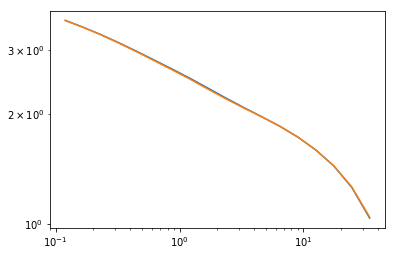

In [66]:
plt.plot(rbc, wp_cab_ys.mean(axis = (0,1)))
plt.plot(rbc, wp_cab_test_ys.mean(axis = (0,1)) )
plt.loglog();
plt.show();

In [79]:
with h5py.File('/u/ki/swmclau2/des/wp_zheng07/PearceWpCosmo.hdf5' , 'r') as wp_hod,\
         h5py.File('/u/ki/swmclau2/des/wp_zheng07_test/PearceWpCosmoTest.hdf5' , 'r') as wp_hod_test:
    
    print wp_hod.attrs['cosmo_param_names']
    print
    print wp_hod_test.attrs['cosmo_param_names']
    
    wp_hod_cosmo = wp_hod.attrs['cosmo_param_vals']
    wp_hod_test_cosmo = wp_hod_test.attrs['cosmo_param_vals']
    
    wp_hod_ys = np.zeros((40,1000,18))
    for i, key in enumerate(wp_hod.keys()):
        wp_hod_ys[i] = wp_hod[key]['a_1.000']['obs'][()]
        
    wp_hod_test_ys = np.zeros((35,1000,18))
    for i, key in enumerate(wp_hod_test.keys()):

        wp_hod_test_ys[i] = wp_hod_test[key]['a_1.000']['obs'][()]

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']


In [70]:
np.all(wp_cab_cosmo == wp_hod_cosmo)

True

In [71]:
np.all(wp_cab_test_cosmo == wp_hod_test_cosmo)

True

In [80]:
with h5py.File('/u/ki/swmclau2/des/ds_cab/PearceDsCABCosmo.hdf5' , 'r') as ds_cab,\
         h5py.File('/u/ki/swmclau2/des/ds_cab_test/PearceDsCABCosmoTest.hdf5' , 'r') as ds_cab_test:
    
    print ds_cab.attrs['cosmo_param_names']
    print
    print ds_cab_test.attrs['cosmo_param_names']
    
    ds_cab_cosmo = ds_cab['attrs']['cosmo_param_vals'][()]
    ds_cab_test_cosmo = ds_cab_test.attrs['cosmo_param_vals']
    
    ds_cab_ys = np.zeros((40,1000,18))
    for i, key in enumerate(ds_cab.keys()):
        if key=='attrs':
            continue
        ds_cab_ys[i-1] = ds_cab[key]['a_1.000']['obs'][()]
        
    ds_cab_test_ys = np.zeros((35,100,18))
    for i, key in enumerate(ds_cab_test.keys()):

        ds_cab_test_ys[i] = ds_cab_test[key]['a_1.000']['obs'][()]

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']


In [81]:
with h5py.File('/u/ki/swmclau2/des/ds_zheng07/PearceDsCosmo.hdf5' , 'r') as ds_hod,\
         h5py.File('/u/ki/swmclau2/des/ds_zheng07_test/PearceDsCosmoTest.hdf5' , 'r') as ds_hod_test:
    
    print ds_hod.attrs['cosmo_param_names']
    print
    print ds_hod_test.attrs['cosmo_param_names']
    
    ds_hod_cosmo = ds_hod.attrs['cosmo_param_vals']
    ds_hod_test_cosmo = ds_hod_test.attrs['cosmo_param_vals']
    
    ds_hod_ys = np.zeros((40,1000,18))
    for i, key in enumerate(ds_hod.keys()):
        ds_hod_ys[i] = ds_hod[key]['a_1.000']['obs'][()]
        
    ds_hod_test_ys = np.zeros((35,1000,18))
    for i, key in enumerate(ds_hod_test.keys()):

        ds_hod_test_ys[i] = ds_hod_test[key]['a_1.000']['obs'][()]

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']

['ombh2' 'omch2' 'w0' 'ns' 'H0' 'Neff' 'sigma8']


In [74]:
np.all(ds_cab_cosmo == wp_cab_cosmo)

True

In [77]:
np.all(ds_cab_test_cosmo == wp_cab_test_cosmo)

True